#Preparação Dataset

### Preparação do Dataset filtrado apenas para o Sudeste e no ano de 2023

In [20]:
import pandas as pd
df = pd.read_parquet("/content/train-00000-of-00001.parquet")

df.head()



,id_subsistema,nom_subsistema,din_instante,val_cargaenergiahomwmed
0,N,NORTE,2020-01-01 00:00:00,4889.1460
1,NE,NORDESTE,2020-01-01 00:00:00,9617.9750
2,S,SUL,2020-01-01 00:00:00,10013.7420
3,SE,SUDESTE,2020-01-01 00:00:00,33108.8615
4,N,NORTE,2020-01-01 01:00:00,4953.3150


In [27]:
df = df.rename(columns={
    "din_instante": "timestamp",
    "val_cargaenergiahomwmed": "consumo_mw",
    "nom_subsistema": "subsistema",
    "id_subsistema": "id"
})

df.head()

,id,subsistema,timestamp,consumo_mw
0,N,NORTE,2020-01-01 00:00:00,4889.1460
1,NE,NORDESTE,2020-01-01 00:00:00,9617.9750
2,S,SUL,2020-01-01 00:00:00,10013.7420
3,SE,SUDESTE,2020-01-01 00:00:00,33108.8615
4,N,NORTE,2020-01-01 01:00:00,4953.3150


In [28]:
#Filtrando apenas Sudeste
df = df[df["id"] == "SE"]
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df[df["timestamp"].dt.year == 2023]
df.head()


,id,subsistema,timestamp,consumo_mw
105219,SE,SUDESTE,2023-01-01 00:00:00,32183.885
105223,SE,SUDESTE,2023-01-01 01:00:00,32196.682
105227,SE,SUDESTE,2023-01-01 02:00:00,31539.570
105231,SE,SUDESTE,2023-01-01 03:00:00,30699.367
105235,SE,SUDESTE,2023-01-01 04:00:00,30126.195


In [29]:
#Criando novas colunas para análise
df["hora"] = df["timestamp"].dt.hour
df["mes"] = df["timestamp"].dt.month
df["dia_semana"] = df["timestamp"].dt.day_name()
df["dia_do_mes"] = df["timestamp"].dt.day
df["tipo_dia"] = df["dia_semana"].apply(lambda x: "FDS" if x in ["Saturday","Sunday"] else "Dia útil")

In [30]:
df["kwh"] = df["consumo_mw"] * 1000
df.to_csv("consumo_sudeste_2023_tratado.csv", index=False)


#Análise Energia Sudeste 2023

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("consumo_sudeste_2023_tratado.csv")
df.head()

,id,subsistema,timestamp,consumo_mw,hora,mes,dia_semana,dia_do_mes,tipo_dia,kwh
0,SE,SUDESTE,2023-01-01 00:00:00,32183.885,0,1,Sunday,1,FDS,3.218388e+07
1,SE,SUDESTE,2023-01-01 01:00:00,32196.682,1,1,Sunday,1,FDS,3.219668e+07
2,SE,SUDESTE,2023-01-01 02:00:00,31539.570,2,1,Sunday,1,FDS,3.153957e+07
3,SE,SUDESTE,2023-01-01 03:00:00,30699.367,3,1,Sunday,1,FDS,3.069937e+07
4,SE,SUDESTE,2023-01-01 04:00:00,30126.195,4,1,Sunday,1,FDS,3.012619e+07


from matplotlib import pyplot as plt
_df_0['consumo_mw'].plot(kind='hist', bins=20, title='consumo_mw')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['hora'].plot(kind='hist', bins=20, title='hora')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['kwh'].plot(kind='hist', bins=20, title='kwh')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('timestamp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='consumo_mw', y='hora', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='hora', y='kwh', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['consumo_mw']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('timestamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='timestamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('consumo_mw')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['kwh']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('timestamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='timestamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('kwh')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('timestamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='timestamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hora']
  ys = series['consumo_mw']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('hora', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('timestamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='timestamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hora')
_ = plt.ylabel('consumo_mw')

from matplotlib import pyplot as plt
_df_10['consumo_mw'].plot(kind='line', figsize=(8, 4), title='consumo_mw')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['hora'].plot(kind='line', figsize=(8, 4), title='hora')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['kwh'].plot(kind='line', figsize=(8, 4), title='kwh')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['timestamp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='consumo_mw', y='timestamp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['timestamp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='hora', y='timestamp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['timestamp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='kwh', y='timestamp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

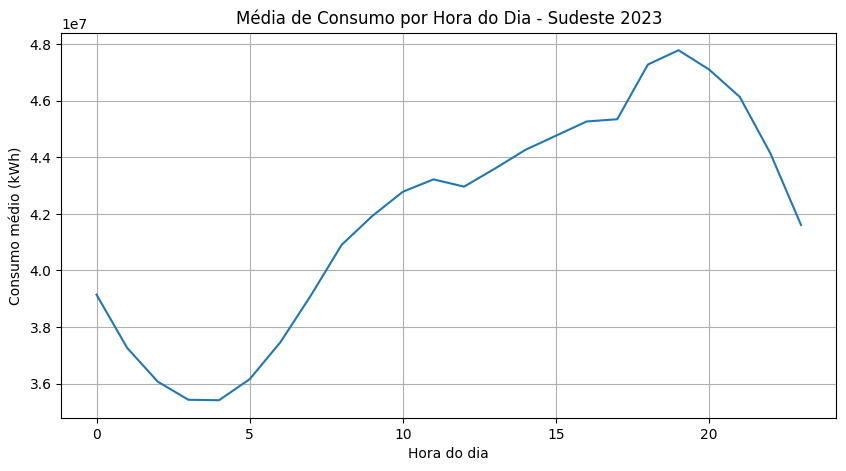

In [41]:
#Comparação Média de Consumo por hora do dia
media_hora = df.groupby("hora")["kwh"].mean()

plt.figure(figsize=(10,5))
media_hora.plot(kind="line")
plt.title("Média de Consumo por Hora do Dia - Sudeste 2023")
plt.xlabel("Hora do dia")
plt.ylabel("Consumo médio (kWh)")
plt.grid(True)
plt.savefig("grafico_consumo_por_hora.png", dpi=300)
plt.show()

<Figure size 1000x500 with 0 Axes>

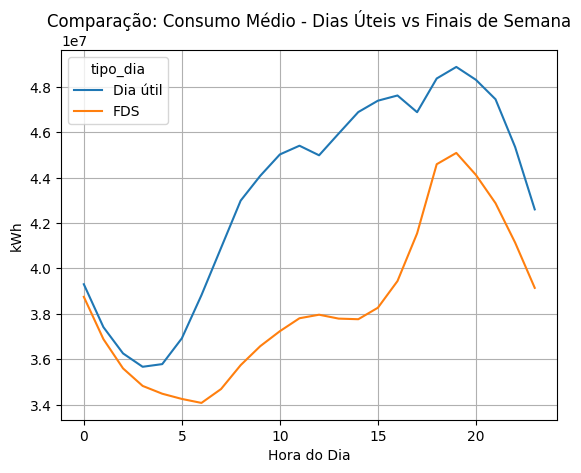

In [42]:
#Comparação dia útil x semana
media_util_fds = df.groupby(["hora","tipo_dia"])["kwh"].mean().unstack()

plt.figure(figsize=(10,5))
media_util_fds.plot()
plt.title("Comparação: Consumo Médio - Dias Úteis vs Finais de Semana")
plt.xlabel("Hora do Dia")
plt.ylabel("kWh")
plt.grid(True)
plt.savefig("grafico_util_fds.png", dpi=300)
plt.show()

In [43]:
limite = df["kwh"].mean() + 1.5 * df["kwh"].std()
df["pico"] = df["kwh"] > limite
df["pico"].value_counts()

,count
pico,
False,8192
True,568


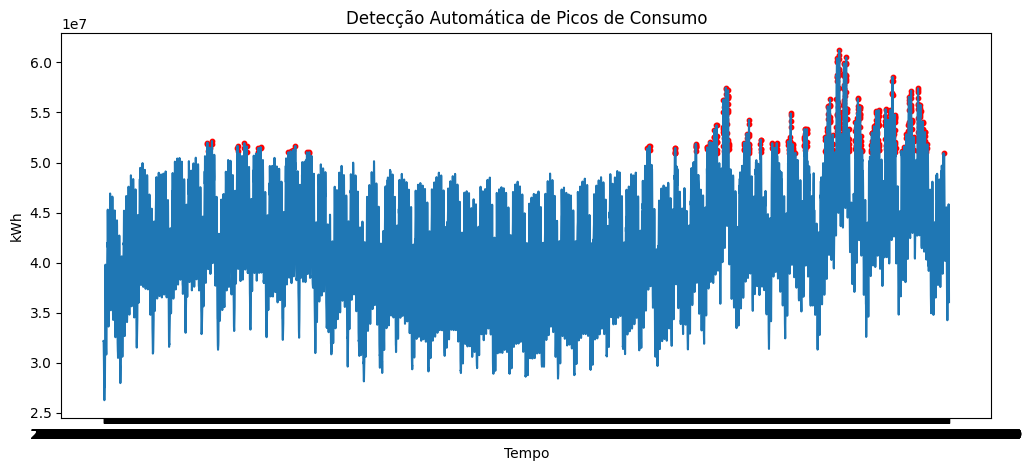

In [44]:
plt.figure(figsize=(12,5))
plt.plot(df["timestamp"], df["kwh"])
plt.scatter(df[df["pico"]]["timestamp"], df[df["pico"]]["kwh"], color="red", s=10)
plt.title("Detecção Automática de Picos de Consumo")
plt.xlabel("Tempo")
plt.ylabel("kWh")
plt.savefig("grafico_picos.png", dpi=300)
plt.show()

In [39]:
# Cálculo da economia simulada
reduzir_percentual = 0.15

picos_kwh = df[df["pico"]]["kwh"].sum()
economia_kwh = picos_kwh * reduzir_percentual

tarifa_media = 0.90  # R$/kWh (valor referência)
economia_reais = economia_kwh * tarifa_media

co2_kg = economia_kwh * 0.1  # média 0,1 kg CO2 por kWh

economia_kwh, economia_reais, co2_kg


(np.float64(4538289484.690615),
 np.float64(4084460536.2215533),
 np.float64(453828948.4690615))

In [40]:
print("---- RESULTADOS DA OTIMIZAÇÃO ----")
print(f"Energia economizada: {economia_kwh:,.2f} kWh")
print(f"Economia estimada: R$ {economia_reais:,.2f}")
print(f"Redução de emissões: {co2_kg:,.2f} kg de CO₂")
print("Picos detectados:", df['pico'].sum())

---- RESULTADOS DA OTIMIZAÇÃO ----
Energia economizada: 4,538,289,484.69 kWh
Economia estimada: R$ 4,084,460,536.22
Redução de emissões: 453,828,948.47 kg de CO₂
Picos detectados: 568


#Conclusão da Análise

## 📌 Conclusões da Análise – Sudeste 2023

A análise do consumo de energia elétrica do subsistema Sudeste (SE/CO) ao longo de 2023 revelou padrões importantes para identificação de desperdício e oportunidades de otimização.

### 🔍 Principais achados
- O pico médio de consumo ocorre entre **18h e 20h**, alcançando valores próximos de **4.8×10⁷ kWh**.
- O menor consumo acontece entre **03h e 05h**, indicando período com baixa demanda real.
- A curva comparativa entre **dias úteis e finais de semana** demonstra que, mesmo com menor demanda operacional, o consumo aos finais de semana permanece elevado nos horários noturnos.
- Foram detectados **568 eventos de pico**, pontos críticos de sobrecarga energética.

### 💡 Oportunidade de melhoria
Foi simulada uma redução de **15% do consumo apenas nos horários classificados como pico**, aplicando medidas como:
- Desligamento automático de equipamentos fora do expediente.
- Reprogramação de cargas não essenciais para horários fora dos picos.
- Monitoramento contínuo e políticas de eficiência energética.

### 📈 Impacto estimado da ação proposta
Com base nos dados de 2023:

| Métrica | Resultado |
|---------|----------|
| Energia economizada | **4.538.289.484,69 kWh** |
| Economia financeira | **R$ 4.084.460.536,22** |
| Redução de emissões | **453.828.948,47 kg de CO₂** |
| Picos mitigados | **568 eventos** |

### 🧾 Conclusão
A análise demonstrou que pequenas otimizações aplicadas a momentos críticos podem gerar impactos significativos tanto financeiros quanto ambientais. Estratégias de gestão ativa da demanda e automação em horários de pico representam soluções eficazes para redução de custos e sustentabilidade do sistema elétrico da região Sudeste.
